In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [2]:
#Setting up the working directory

os.chdir("E:\PGP AIML\Projects\Supervised Learning\Project 2") 

In [3]:
#Importing Data

bank = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [4]:
#Removing spaces in column names

bank.columns = bank.columns.str.replace(' ', '')

In [5]:
bank.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bank.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [7]:
bank.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
bank.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

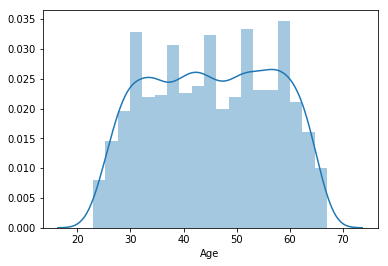

In [9]:
sns.distplot(bank['Age'])

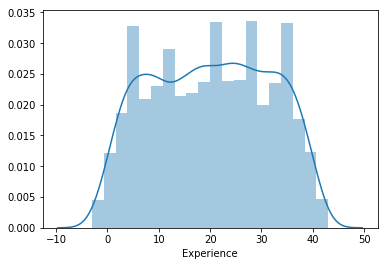

In [10]:
sns.distplot(bank['Experience'])

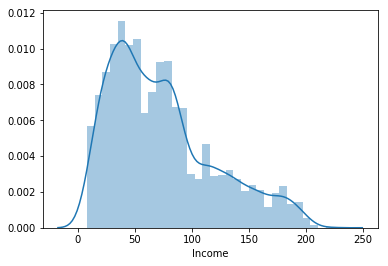

In [11]:
sns.distplot(bank['Income'])

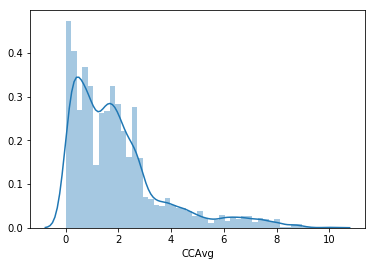

In [12]:
sns.distplot(bank['CCAvg'])

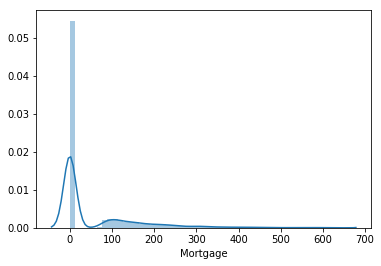

In [13]:
sns.distplot(bank['Mortgage'])

In [14]:
print((bank['CreditCard'].value_counts(normalize = True))*100)
print((bank['Online'].value_counts(normalize = True))*100)
print((bank['CDAccount'].value_counts(normalize = True))*100)
print((bank['SecuritiesAccount'].value_counts(normalize = True))*100)
print((bank['Education'].value_counts(normalize = True))*100)
print((bank['Family'].value_counts(normalize = True))*100)

0    70.6
1    29.4
Name: CreditCard, dtype: float64
1    59.68
0    40.32
Name: Online, dtype: float64
0    93.96
1     6.04
Name: CDAccount, dtype: float64
0    89.56
1    10.44
Name: SecuritiesAccount, dtype: float64
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64
1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64


In [15]:
bank.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [16]:
bank.var()

ID                   2.083750e+06
Age                  1.314042e+02
Experience           1.315140e+02
Income               2.119104e+03
ZIPCode              4.502257e+06
Family               1.317130e+00
CCAvg                3.054312e+00
Education            7.053801e-01
Mortgage             1.034570e+04
PersonalLoan         8.680136e-02
SecuritiesAccount    9.351934e-02
CDAccount            5.676319e-02
Online               2.406779e-01
CreditCard           2.076055e-01
dtype: float64

## Observations

In [17]:
#1. Some customers have negative value in experience. We need to treat those values
#2. Majority of the customers are in 30 - 60 years age range
#3. Most of the customers have 5 - 35 years of professional experience and less than 100K annual income
#4. 70% of the customers are not using the credit card, 60% have an online account. 
#5. Almost all of them have a securities account and CD account
#6. Age is highly correlated with Experience
#7. There is no variance in Securities Account, CD Account

In [18]:
#Imputing negative values in experience with median values

bank['Experience'] = np.where(bank['Experience'] < 0,bank['Experience'].median(),bank['Experience'])

In [19]:
#Distribution of Label Column

print((bank['PersonalLoan'].value_counts(normalize = True))*100)

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64


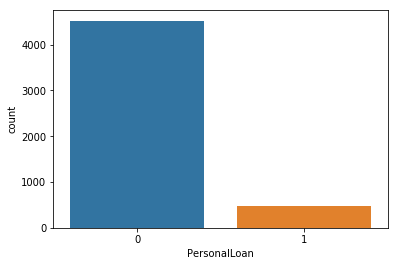

In [20]:
sns.countplot(bank['PersonalLoan'])

# Only 9.6% of the customers have accepted Personal Loan

In [21]:
#Encoding Categorical Variables

categorical_cols = ['Education','Family','Online','CreditCard']

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
bank[categorical_cols] = bank[categorical_cols].apply(lambda col: le.fit_transform(col))

In [22]:
#Separating Features and Label

X = bank.loc[:, bank.columns != 'PersonalLoan']
X.shape

(5000, 13)

In [23]:
Y = bank['PersonalLoan']
Y.shape

(5000,)

In [24]:
# Dropping ID because it is not useful for the model
# Dropping 'SecuritiesAccount','CDAccount' because they have very less variance
# Dropping Experience because it has very high correlation with Age

X = X.drop(['ID','SecuritiesAccount','CDAccount','Experience'], axis=1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [26]:
# Standardizing all features

sc=StandardScaler()
sc.fit(X_train.values)

scaled_features = sc.transform(X_train.values)

Sclaed_X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

In [27]:
scaled_features1 = sc.transform(X_test.values)

Sclaed_X_test = pd.DataFrame(scaled_features1, index=X_test.index, columns=X_test.columns)

## Logistic Model

In [28]:
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
Test_pred_LR=logisticRegr.predict(X_test)

In [30]:
accuracy_score(Y_test, Test_pred_LR)

0.8993333333333333

In [31]:
recall_score(Y_test, Test_pred_LR)

0.25949367088607594

## KNN

In [32]:
k = np.arange(1,11,2)
knn = KNeighborsClassifier(weights = 'uniform', metric='euclidean')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'balanced_accuracy', cv=10)

In [33]:
GS.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 3, 5, 7, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=0)

In [34]:
GS.best_params_

{'n_neighbors': 1}

In [35]:
GS.best_score_

0.6841719911458449

In [36]:
Test_pred_KNN=GS.predict(X_test)

In [37]:
accuracy_score(Y_test, Test_pred_KNN)

0.864

In [38]:
recall_score(Y_test, Test_pred_KNN)

0.2911392405063291

## Naive Bayes

In [39]:
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
Test_pred_NB=NB.predict(X_test)

In [41]:
accuracy_score(Y_test, Test_pred_NB)

0.9033333333333333

In [42]:
recall_score(Y_test, Test_pred_NB)

0.6265822784810127

## Confusion Matrix

In [43]:
# Function to create pretty looking confusion matrix with recall

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

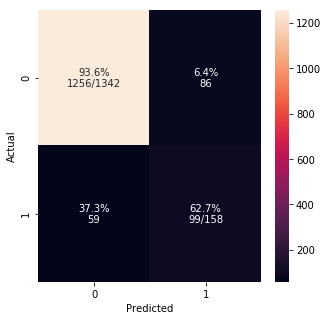

In [44]:
cm_analysis(Y_test, Test_pred_NB, NB, NB.classes_, ymap=None, figsize=(5,5))

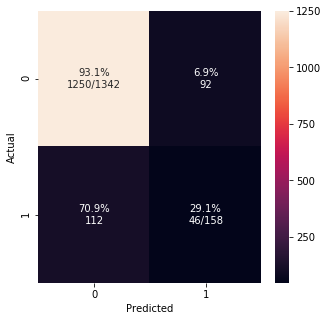

In [45]:
cm_analysis(Y_test, Test_pred_KNN, GS, GS.classes_, ymap=None, figsize=(5,5))

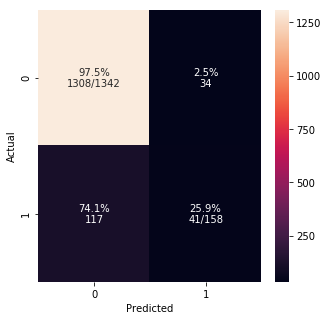

In [46]:
cm_analysis(Y_test, Test_pred_LR, logisticRegr, logisticRegr.classes_, ymap=None, figsize=(5,5))

## Model Section Reasoning

In [47]:
# Naive Bayes seems to be the best model.
# It has the highest accuracy of 90.4% on test data set
# Also, Naive Bayes has the highest recall of 62.7%